In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns= None
from itertools import product
from sklearn.linear_model import LogisticRegression


## 1. Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 

### Bottle dataset preprocessing

In [3]:
#load bottle dataset
bottle_df = pd.read_csv("../week_13/bottle.csv",low_memory=False)

In [4]:
bottle_df.tail(3)

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,5.796,23.88911,108.46,253.06,3.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.915,NaN,0.182,NaN,0.20,NaN,1.75,NaN,0.027,NaN,0.09,NaN,0.00,4.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5.80,108.5,1.8,0.20,0.1,0.03,0.00,0.92,0.18,5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,5.816,24.01426,107.74,253.92,2.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.078,NaN,0.313,NaN,0.25,NaN,1.99,NaN,0.030,NaN,0.11,NaN,0.12,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,18.16,18.16,33.406,24.014,389.1,0.040,5.82,107.7,2.0,0.25,0.1,0.03,0.12,1.08,0.31,10,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864862,34404,864863,093.4 026.4,20-1611SR-MX-310-2239-09340264-0015A-3,15,17.533,33.3880,5.774,24.15297,105.66,252.08,1.0,3,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.118,NaN,0.614,NaN,0.31,NaN,2.58,NaN,0.054,NaN,0.14,NaN,0.07,NaN,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,15.0,17.53,17.53,33.388,24.153,376.0,0.059,5.77,105.7,2.6,0.31,0.1,0.05,0.07,2.12,0.61,15,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Handling null values

In [5]:
#Get the column names where null value count is greater than 100000
#There are 50 columns that match this criteria
null_cnt_df = pd.DataFrame(bottle_df.isnull().sum())
null_cnt_df.columns = ['Sum']
null_cnt_df = null_cnt_df[null_cnt_df['Sum']>100000]
null_cnt_df.T.columns

#drop those null value columns from above step
dropped_values_df = bottle_df.drop(null_cnt_df.T.columns,axis=1)

In [6]:
#dropping columns not needed for analysis
dropped_values_df.drop(['Sta_ID','Depth_ID','Cst_Cnt','Btl_Cnt'],axis=1,inplace=True)


In [7]:
bottle_df.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
Cst_Cnt,1.000000,0.999345,-0.162222,0.089329,-0.198024,0.156096,-0.089902,0.136510,0.147493,-0.026749,-0.100142,0.067977,-0.840300,0.458220,-0.899177,-0.002683,-0.563832,-0.780221,-0.457026,0.005756,-0.021278,-0.040761,-0.021694,-0.159404,-0.036510,-0.054884,-0.031979,0.002367,-0.180492,-0.001969,-0.160680,0.022752,-0.191920,0.009857,0.003005,-0.003065,0.010973,0.003502,-0.003065,0.060979,-0.021867,-0.002954,0.019067,0.003529,-0.003116,-3.611079e-01,-0.162220,0.089337,0.071169,-0.197496,-0.095794,0.107822,-0.138037,0.156117,0.133260,-0.054867,-0.159410,-0.001971,0.002631,0.022702,0.005807,-0.040576,-0.161961,-0.604945,-0.036155,-0.097938,-0.075060,-0.115212,-0.262587,0.020778
Btl_Cnt,0.999345,1.000000,-0.161617,0.090118,-0.195207,0.154219,-0.089521,0.134732,0.145498,-0.027514,-0.100828,0.062864,-0.847992,0.456784,-0.900722,-0.002741,-0.574244,-0.784094,-0.465335,0.009596,-0.020895,-0.035966,-0.021321,-0.157624,-0.036072,-0.052719,-0.031528,0.005897,-0.181636,0.000945,-0.161144,0.022613,-0.197998,0.012137,0.000640,-0.002950,0.013143,0.000945,-0.002950,0.065715,-0.023403,-0.002821,0.021229,0.000793,-0.003000,-3.691598e-01,-0.161614,0.090126,0.072048,-0.194687,-0.095405,0.107463,-0.138205,0.154240,0.131503,-0.052701,-0.157630,0.000943,0.006174,0.022562,0.009648,-0.035778,-0.161348,-0.595142,-0.035516,-0.097251,-0.074255,-0.114165,-0.259082,0.020315
Depthm,-0.162222,-0.161617,1.000000,-0.681201,0.572630,-0.592399,0.582710,-0.595547,-0.589175,-0.681935,0.082316,0.019422,-0.257070,0.005934,0.143708,0.000775,0.006826,0.071524,0.017948,-0.279623,0.006753,-0.201464,0.006941,0.667351,-0.000514,0.846583,-0.004010,-0.158329,0.011480,0.687875,0.029994,-0.164553,0.011573,-0.263494,0.598282,0.001983,-0.252364,0.600022,0.001983,-0.246394,0.064378,0.001863,-0.262304,0.613581,0.002004,-4.722930e-01,1.000000,-0.681202,-0.679035,0.571185,0.606262,-0.669232,0.927118,-0.592399,-0.596687,0.846587,0.667357,0.687878,-0.158345,-0.164482,-0.279636,-0.201450,0.999994,-0.018605,0.567855,0.572374,0.786873,0.866185,0.223304,-0.611798
T_degC,0.089329,0.090118,-0.681201,1.000000,-0.505266,0.795700,-0.829155,0.850596,0.795543,0.750413,-0.066507,-0.041076,0.162308,-0.036218,-0.059252,-0.000631,0.040984,-0.033225,0.012337,0.108915,-0.006510,0.014997,-0.006761,-0.904177,-0.000423,-0.840342,-0.000285,0.097438,-0.016217,-0.925475,-0.068859,0.132410,0.001007,-0.006938,-0.343639,-0.004169,0.001768,-0.341165,-0.004169,0.071381,-0.020106,-0.004066,-0.012035,-0.332483,-0.004214,3.413918e-01,-0.681200,1.000000,0.999954,-0.503959,-0.862161,0.964171,-0.799025,0.795700,0.850365,-0.840343,-0.904179,-0.925476,0.097463,0.132263,0.108925,0.014987,-0.679852,0.006503,-0.936239,-0.949972,-0.742196,-0.889635,0.547436,0.743735
Salnty,-0.198024,-0.195207,0.572630,-0.505266,1.000000,-0.823870,0.603470,-0.790231,-0.824338,-0.693341,0.067320,-0.019075,-0.191714,-0.079280,0.207788,0.002334,0.039711,-0.166754,0.041840,-0.029364,0.010279,-0.003073,0.010728,0.825373,-0.005705,0.795998,-0.002501,-0.151627,0.023391,0.849224,0.067711,-0.118747,0.025301,0.197514,0.081642,0.004085,0.185960,0.078252,0.004085,0.141338,-0.058609,0.003950,0.179633,0.092569,0.004141,-2.892580e-02,0.572629,-0.505268,-0.507023,0.997428,0.628311,-0.698367,0.669824,-0.823871,-0.790542,0.796000,0.825378,0.849227,-0.151664,-0.118660,-0.029373,-0.003063,0.571405,-0.000758,0.938153,0.955942,0.895124,0.937147,0.583807,0.106417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

### Remove extreme outliers of Depthm


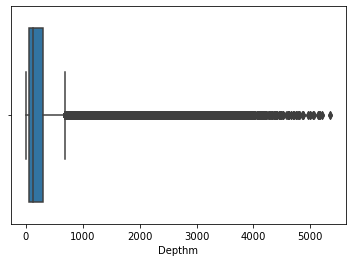

In [8]:
#remove extreme outliers of Depthm
sns.boxplot(x='Depthm',data=dropped_values_df)
dropped_values_df = dropped_values_df.query("Depthm<800")

### Remove extreme outliers of STheta

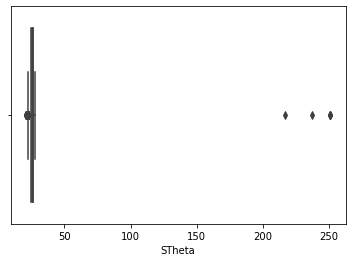

In [9]:
sns.boxplot(x='STheta',data=dropped_values_df)
dropped_values_df = dropped_values_df.query("STheta<100")

In [10]:
dropped_values_df.describe()

,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
count,774489.000000,774489.000000,774489.000000,774489.000000,774489.000000,774489.000000,774489.000000,718050.000000,759887.000000,759885.000000,752775.000000,752774.000000,774489.000000,774489.000000,773707.000000,774489.000000,772737.000000,772737.000000,770370.000000,774489.000000
mean,173.654792,11.194566,33.810633,25.739995,4.652439,2.016499,2.720204,8.941097,8.999991,8.999991,8.999991,8.999991,173.655386,11.194589,11.176060,33.810575,25.735850,227.662633,0.384054,174.641773
std,169.368874,4.005738,0.448543,0.965638,1.866321,0.146970,0.448899,0.539485,0.003035,0.003035,0.003049,0.003049,169.368365,4.005741,4.015759,0.449772,0.965167,89.767362,0.300404,170.579275
min,0.000000,2.880000,28.431000,20.934000,3.000000,1.000000,2.000000,4.000000,8.000000,8.000000,8.000000,8.000000,0.000000,2.880000,3.450000,4.570000,20.934000,0.600000,0.000000,0.000000
25%,41.000000,8.110000,33.476000,24.925000,3.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,41.000000,8.110000,8.090000,33.476000,24.920000,149.600000,0.130000,41.000000
50%,119.000000,10.360000,33.821000,25.907000,3.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,119.000000,10.360000,10.350000,33.821000,25.900000,211.000000,0.320000,120.000000
75%,250.000000,14.100000,34.156000,26.580000,7.000000,2.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,250.000000,14.100000,14.090000,34.156000,26.579000,303.100000,0.590000,252.000000
max,799.000000,31.140000,37.034000,27.954000,7.000000,3.000000,3.000000,9.000000,9.000000,9.000000,9.000000,9.000000,799.000000,31.140000,31.140000,37.034000,27.950000,683.400000,1.600000,806.000000


In [11]:
dropped_values_df = dropped_values_df.fillna({"NH3q":dropped_values_df["NH3q"].mean(),
                         "C14A1q":dropped_values_df["C14A1q"].mean(),
                         "C14A2q":dropped_values_df["C14A1q"].mean(),
                         "DarkAq":dropped_values_df["DarkAq"].mean(),
                         "MeanAq":dropped_values_df["MeanAq"].mean(),
                         "R_POTEMP":dropped_values_df["R_POTEMP"].mean(),
                         "R_SIGMA":dropped_values_df["R_POTEMP"].mean(),
                         "R_SVA":dropped_values_df["R_POTEMP"].mean(),
                         "R_DYNHT":dropped_values_df["R_POTEMP"].mean()})

In [12]:
dropped_values_df.isnull().sum()

Depthm        0
T_degC        0
Salnty        0
STheta        0
RecInd        0
T_prec        0
S_prec        0
NH3q          0
C14A1q        0
C14A2q        0
DarkAq        0
MeanAq        0
R_Depth       0
R_TEMP        0
R_POTEMP      0
R_SALINITY    0
R_SIGMA       0
R_SVA         0
R_DYNHT       0
R_PRES        0
dtype: int64

## 2. Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?
* Feature selection using correlation
    * Looking at the correlation of features with T_degC and keeping those where correlation > 0.5
    *   Last assignement we did with Salnty, to look for which feature can be used alongwith Salnty, check the correlation between features. It needs to be uncorrelated.
    *   Looking at the values below, selecting Depthm feature alongwith Salnty. Correlation between Salnty and Depthm is 0.5726303059321461
    
* Feature selection using RFE feature selection.
    * RFE feature selection has support as True for Depthm

In [13]:
cor = bottle_df.corr()
#Correlation with output variable
cor_target = abs(cor["T_degC"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

Depthm         0.681201
T_degC         1.000000
Salnty         0.505266
O2ml_L         0.795700
STheta         0.829155
O2Sat          0.850596
Oxy_µmol/Kg    0.795543
BtlNum         0.750413
PO4uM          0.904177
SiO3uM         0.840342
NO3uM          0.925475
R_Depth        0.681200
R_TEMP         1.000000
R_POTEMP       0.999954
R_SALINITY     0.503959
R_SIGMA        0.862161
R_SVA          0.964171
R_DYNHT        0.799025
R_O2           0.795700
R_O2Sat        0.850365
R_SIO3         0.840343
R_PO4          0.904179
R_NO3          0.925476
R_PRES         0.679852
DIC1           0.936239
DIC2           0.949972
TA1            0.742196
TA2            0.889635
pH2            0.547436
pH1            0.743735
Name: T_degC, dtype: float64


In [14]:
#Print correlation with Salnty , to select independent feature which is uncorrelated with Salnty
for feature in relevant_features.index:
    if feature!="Salnty" and feature!="T_degC":
        var_corr = bottle_df[["Salnty",feature]].corr()
        #print(var_corr)
        print(feature, var_corr["Salnty"][feature])
             

Depthm 0.5726303059321461
O2ml_L -0.8238698049458881
STheta 0.6034698112427563
O2Sat -0.7902313193112036
Oxy_µmol/Kg -0.8243377286265787
BtlNum -0.6933414539714063
PO4uM 0.82537267831577
SiO3uM 0.7959979781479894
NO3uM 0.8492239803911755
R_Depth 0.5726290692480156
R_TEMP -0.5052675239776879
R_POTEMP -0.5070231236412326
R_SALINITY 0.9974283339991873
R_SIGMA 0.6283107805608469
R_SVA -0.6983666359586079
R_DYNHT 0.669824062152325
R_O2 -0.8238708634888539
R_O2Sat -0.790541725735272
R_SIO3 0.7959995649792323
R_PO4 0.8253775919153433
R_NO3 0.8492268794341115
R_PRES 0.5714046269212713
DIC1 0.9381533984551459
DIC2 0.9559416920878873
TA1 0.8951243065186355
TA2 0.9371469066387578
pH2 0.5838071710152668
pH1 0.10641720372034617


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X1 = dropped_values_df.drop(["T_degC"],axis=1)
y1 = dropped_values_df["T_degC"]

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y1)  
#Fitting the data to model
model.fit(X_rfe,y1)
print(rfe.support_)
print(rfe.ranking_)


[ True False False False False False  True  True  True False  True  True
  True False False False False False False]
[ 1  2  3  9  5  6  1  1  1 11  1  1  1  7 10 12 13  8  4]


In [16]:
X1.columns
X1.columns[np.where(rfe.support_ == True)[0]]

Index(['Depthm', 'NH3q', 'C14A1q', 'C14A2q', 'MeanAq', 'R_Depth', 'R_TEMP'], dtype='object')

## Selecting the features from dataframe

In [17]:
mreg_df = dropped_values_df[['Salnty','Depthm','T_degC']] #,'Depthm',Salnty','STheta' ]]
#mreg_df = mreg_df.dropna()mreg_df.head()

In [18]:
X = mreg_df[['Salnty','Depthm']] #,'Depthm',Salnty','STheta' ]]
#'RecInd', 'T_prec', 'S_prec','NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq','R_DYNHT', 'R_PRES']].values
y = mreg_df['T_degC'].values

## Standardization

In [19]:
min_max_scaler = StandardScaler()
X= min_max_scaler.fit_transform(X)
X[:5]

array([[-0.82630421, -1.02530589],
       [-0.82630421, -0.97807168],
       [-0.83299253, -0.96626313],
       [-0.87089301, -0.91312464],
       [-0.86866357, -0.90722036]])

In [20]:
print(X.shape,y.shape)

(774489, 2) (774489,)


### Plot Salnty, Depthm and T_degC

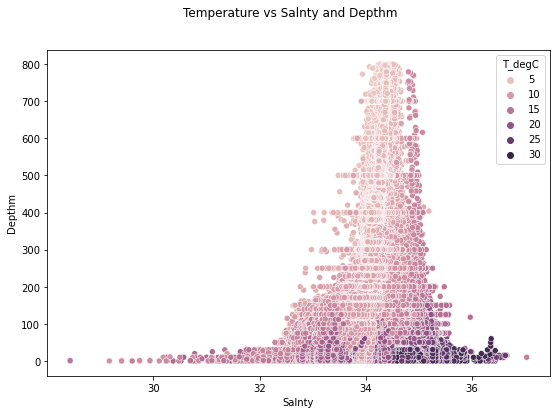

In [21]:
plt.figure(figsize=(9,6))
# Add a scatter plot layer to the regplot
sns.scatterplot(x="Salnty",
                y="Depthm",
                hue='T_degC',
                data=mreg_df)
plt.suptitle("Temperature vs Salnty and Depthm")
plt.xlabel("Salnty")
plt.ylabel("Depthm")
# Show the layered plot
plt.show()

## 3. Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown

### Multiple linear regression using LinearRegression model

In [22]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X,y)

LinearRegression()

In [23]:
y_pred = regression.predict(X)


In [24]:
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
#Accuracy
accuracy_score = regression.score(X,y)
print("Accuracy",accuracy_score)

#R2 score
print("R2-score: %.2f" % r2_score(np.asanyarray(y), y_pred))

#Mean Squared Error
mse = mean_squared_error(y, regression.predict(X))
print("MSE: %.2f"% mse)

#Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

Accuracy 0.6337733323271753
R2-score: 0.63
MSE: 5.88
Root Mean Squared Error: 2.4241374394810227


In [25]:
print(regression.coef_)

[ 0.56759561 -3.53432946]


In [26]:
print(regression.intercept_)

11.194566151359151


### Resulting equation from sklearn LinearRegression model

- Salinity = 0.56759561  
- Depthm = -3.53432946 
- intercept = 11.194566151359151

* T_degC= intercept + 0.56759561*Salinity + -3.53432946*Depthm 


In [27]:
#what do the coefficients tell you? 
#These values tell us that if the Salinity increase by 1g, the Temperature change by -3.53702548C.
#And if Depthm increases by 1 meter, the Temperature  increases by 0.56499608C.
#This is a fair guess, but let test it, below

y_temp_pred = regression.predict([[33.440,5]])
print(y_temp_pred)

temp_c = regression.intercept_ + (regression.coef_[0]*33.440) + (regression.coef_[1]*5) 
#temp_c = 11.194566151359151 + (0.56499608*33.440) + (-3.53702548*5) 
print("Temperature:",temp_c)


[12.50331589]
Temperature: 12.503315886328117


In [28]:
print(mreg_df['Salnty'].min())
print(mreg_df['Salnty'].max())
print(mreg_df['Depthm'].min())
print(mreg_df['Depthm'].max())

28.431
37.034
0
799


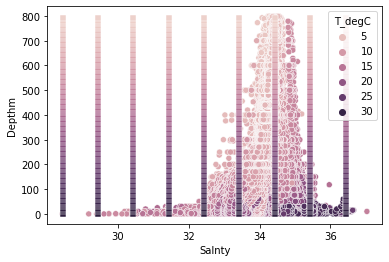

In [29]:
# Create Salnty as an array of numbers from 28.431, 37.035
Salnty = np.arange(28.431, 37.035)


# Create Depthm as an array of numbers from 0 to 800 in steps of 10
Depthm = np.arange(0, 800, 10)

# Create p as all combinations of values of Salnty and Depthm
p = product(Salnty, Depthm)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["Salnty", "Depthm"])
#explanatory_data = pd.DataFrame({"Salnty":Salnty,"Depthm": Depthm})


# Add column of predictions
prediction_data = explanatory_data.assign(
    T_degC = regression.predict(explanatory_data))

# Create scatter plot of dataset
sns.scatterplot(x="Salnty", y="Depthm", data=mreg_df, hue="T_degC")

# Create scatter plot of prediction_data without legend
sns.scatterplot(x="Salnty", y="Depthm", data=prediction_data, hue="T_degC", legend=False, marker="s")

# Show the plot
plt.show()


## Multiple linear regression using statsmodel ols

In [30]:
from statsmodels.formula.api import ols
#dropped_values_df['sqrt_Depthm'] = np.sqrt(dropped_values_df['Depthm'])

# Fit the linear regression of T_degC vs. salinity and sqrt Depthm, no interaction
mlr = ols("T_degC ~ Salnty * Depthm",data=mreg_df).fit()

# See the result
print(mlr.params)

Intercept        26.028060
Salnty           -0.310022
Depthm           -0.958411
Salnty:Depthm     0.027372
dtype: float64


### Resulting equation from  Statsmodel ols
 

* T_degC = intercept +  -0.310022*Salinity + -0.958411*Depthm

In [31]:
#Looking at the values printed above for intercept and slopes
#T_degC = intercept +  -0.310022*Salinity + -0.958411*Depthm

temp_degree = 26.028060 + -0.310022*33.440 + -0.958411*5
print(temp_degree)

10.868869319999998


In [32]:
print("R Sqaured:", mlr.rsquared)

R Sqaured: 0.7076359128113041


     Salnty  Depthm     T_degC
0    28.431       0  17.213835
1    28.431      10  15.411830
2    28.431      20  13.609824
3    28.431      30  11.807819
4    28.431      40  10.005814
..      ...     ...        ...
715  36.431     750  43.814579
716  36.431     760  44.202324
717  36.431     770  44.590070
718  36.431     780  44.977815
719  36.431     790  45.365561

[720 rows x 3 columns]


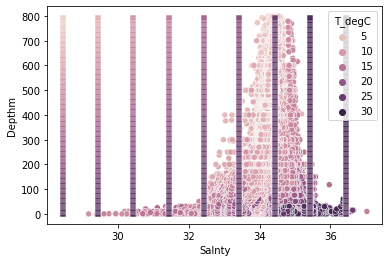

In [33]:
# Create Salnty as an array of numbers from 28.431, 37.035
Salnty = np.arange(28.431, 37.035)


# Create Depthm as an array of numbers from 0 to 800 in steps of 10
Depthm = np.arange(0, 800, 10)

# Create p as all combinations of values of Salnty and Depthm
p = product(Salnty, Depthm)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["Salnty", "Depthm"])

# Add column of predictions
prediction_data = explanatory_data.assign(
    T_degC = mlr.predict(explanatory_data))
    
# See the result  
print(prediction_data)


# Create scatter plot of dataset
sns.scatterplot(x="Salnty", y="Depthm", data=mreg_df, hue="T_degC")

# Create scatter plot of prediction_data without legend
sns.scatterplot(x="Salnty", y="Depthm", data=prediction_data, hue="T_degC", legend=False, marker="s")

# Show the plot
plt.show()

## 4. Which regression approach had the “best” performance? Be sure to compare it to what you did last week.
   * Looking at linear regression where only one feature "Salinity" was used to predict temperature, accuracy was 26%
   * Looking at Polynomial feature regression with "Salinity" as feature to predict temperature, accuracy was 27% with degrees=2
   * Doing multiple regression with adding one more feature "Depthm" alongwith "Salinity" accuracy improved to 63% and MSE: 5.88 , Root Mean Squared Error: 2.4241374394810227
   * Doing multiple regression with these features 'Depthm','Salnty' and statsmodel accuracy is 70% ,R Sqaured 0.7076359128113041
   
** Looking at above data, doing multiple regression gave the optimal performance than linear and polynomial regression

# Diabetes Dataset

In [34]:
diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
corr = diabetes_df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Feature Selection

In [37]:
from sklearn.feature_selection import RFE

X2 = diabetes_df.drop(["Outcome"],axis=1)
y2 = diabetes_df["Outcome"]

model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 7)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X2,y2)  

#Fitting the data to model
model.fit(X_rfe,y2)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True  True  True]
[1 1 1 2 1 1 1 1]


In [38]:
rfe_features = X2.columns[np.where(rfe.support_ == True)[0]]
print(rfe_features)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


## 5. Work with the diabetes dataset to perform multiple logistic regression. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that. 

* Using sklearn model
    - F1 score is highest with features used given by feature selection

    - Model fit using all the features given by feature selection:
        * Precision  0.76  ,    Recall   0.84  ,    F1 score 0.80   ,    accuracy  0.72

    - with featureset 1 :
        * Precision 0.66   ,  Recall  0.87   ,  F1 score 0.75  ,  accuracy    0.62   

    - with featureset 2 :
         * Precision  0.69  ,    Recall   0.84   ,   F1 score 0.76     ,     accuracy   0.66  

    - with featureset 3 :
        * Precision  0.74    ,  Recall   0.85   ,   F1 score 0.79   ,    accuracy  0.71

In [39]:
feature_set1 = ['BloodPressure', 'Insulin', 'BMI','DiabetesPedigreeFunction']
feature_set2 = ['BMI','Age','Insulin']
feature_set3 = ['Pregnancies','Glucose']

X = diabetes_df[rfe_features]
#X = diabetes_df[feature_set1]
#X = diabetes_df[feature_set2]
#X = diabetes_df[feature_set3]
#X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


In [40]:
#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Multiple logistic regression using statsmodel

In [41]:
#use logit 
from statsmodels.formula.api import logit
import statsmodels.api as sm
#no interaction
#age_gl_no_int=logit("Outcome ~ Age + Glucose", data=diabetes_df).fit()
#print(age_gl_no_int.params)

#interaction
#age_gl_int=logit("Outcome ~ Glucose * Insulin * BMI", data=diabetes_df).fit()
#print(age_gl_int.params)
#conf_matrix = age_gl_int.pred_table()
#print(conf_matrix)
#print(age_gl_int.summary())

log_reg = sm.Logit(y_train, X_train).fit()
#log_reg.summary()


Optimization terminated successfully.
         Current function value: 0.526841
         Iterations 6


In [42]:
# performing predictions on the test datdaset
yhat = log_reg.predict(X_test)
stat_y_prediction = list(map(round, yhat))
  
# comparing original and predicted values of y
print('Acutal values', list(y_test.values))
print('Predictions :', stat_y_prediction)

Acutal values [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]
Predictions : [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]


### Multiple logistic regression using sklearn

In [43]:
#Simplest logistic regression approach
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


In [44]:
# performing predictions on the test datdaset
skl_y_predicted = clf.predict(X_test)

# comparing original and predicted values of y
print('Acutal values', list(y_test.values))
print('Predictions :', skl_y_predicted)

Acutal values [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]
Predictions : [1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0]


In [45]:
clf.score(X_test,y_test)

0.7207792207792207

## 6.What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why?
* Accuracy is the proportion of predictions that are correct.
    -  Accuracy score can be misleading if our dataset is imbalanced. An imbalanced dataset means that suppose we have 1000 individuals out of which 999 didn’t have Diabetes while 1 individual had. If we train our model on this data, it becomes biased towards people not having Diabetes. Since it has only seen one individual having Diabetes, while rest of the individuals not having Diabetes, it tends to predict any new person coming as not having Diabetes. Suppose, we trained our model and applied it on 5 individuals. Out of the 5, 3 didn’t have Diabetes while 2 had Diabetes. But since the model is biased, may be it will predict all the 5 as not having Diabetes. So the accuracy will be 75%. But suppose all the 5 individuals had Diabetes, and model predicted 4 not having Diabetes. This time the accuracy will be only 20% (1/5). Therefore, as the dataset changes, the accuracy changes as well and we cannot solely depend on it. Hence,Precision and Recall tries to address this issue.
    
* Sensitivity is the proportion of true observations that are correctly predicted by the model as being true.
    - It is also referred to as ‘True Negative Rate’ (Proportion of actual negatives that are correctly identified), i.e. more True Negatives the data hold the higher its Specificity.
    
* Specificity is the proportion of false observations that are correctly predicted by the model as being false.

* Precision - It is the ‘Exactness’, ability of the model to return only relevant instances. If your use case/problem statement involves minimizing the False Positives.Precision is about Repeatability & Consistency

* Recall - It is the ‘Completeness’, ability of the model to identify all relevant instances, True Positive Rate, aka Sensitivity. In the current scenario if your focus is to have the least False Negatives. 

* f1 score - Harmonic mean of Precision & Recall, used to indicate a balance between Precision & Recall providing each equal weightage, it ranges from 0 to 1. F1 Score reaches its best value at 1 (perfect precision & recall) and worst at 0. Higher the value of F1 Score, better is the model


* In Diabetes dataset, we don’t want healthy people to be wrongly classified as Diabetic and Diabetic people wrongly classified as non-diabetic hence Precision and Recall is an important matrix. F1 score looks at both precision and recall.
    - If we have very low precision in our model, then most of the positive predictions in our model will be wrong. In this problem statement, if precision is low then most of the patients will be diagnosed with Diabetes. 
    - If we have very low recall then most of the patients who have Diabetes will be predicted as not having Diabetes. 
  

    * from sklearn logit model
      Precision is 0.76
      Recall is 0.84
      F1 score is 0.80
      Accuracy is 0.72

    * from statsmodel
       Precision is 0.91
       Recall is 0.72
       f1 score is 0.80 
       Accuracy is 0.77

### Accuracy, Precision, Recall and F1 score from sklearn model

In [46]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

print(classification_report(y_test, skl_y_predicted))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.63      0.50      0.56        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154



In [47]:
cmatrix = confusion_matrix(y_test, skl_y_predicted)
print(cmatrix)


[[84 16]
 [27 27]]


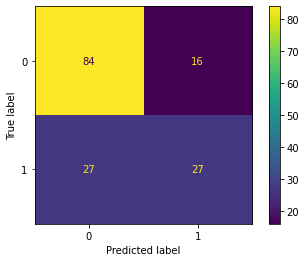

In [48]:
plot_confusion_matrix(clf, X_test, y_test) 

### Accuracy, Precision, Recall and F1 score from statsmodel ols

In [51]:
from sklearn.metrics import (confusion_matrix, 
                           accuracy_score)
  
# confusion matrix
conf_matrix = confusion_matrix(y_test, stat_y_prediction) 
print ("Confusion Matrix : \n", conf_matrix) 
  
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, stat_y_prediction))

Confusion Matrix : 
 [[72 28]
 [ 7 47]]
Test accuracy =  0.7727272727272727


In [52]:
print(classification_report(y_test, stat_y_prediction))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       100
           1       0.63      0.87      0.73        54

    accuracy                           0.77       154
   macro avg       0.77      0.80      0.77       154
weighted avg       0.81      0.77      0.78       154



(<Figure size 432x288 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.6461200491051238, 0.7176079734219268),
  ('0', '1'): (0.0,
   0.7209302325581394,
   0.6461200491051238,
   0.27906976744186046),
  ('1', '0'): (0.6510951734832332,
   0.0,
   0.34890482651676685,
   0.12919896640826872),
  ('1', '1'): (0.6510951734832332,
   0.13252122554448134,
   0.34890482651676685,
   0.8674787744555186)})

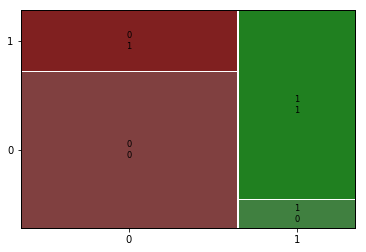

In [53]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)

In [54]:
#Calculate Accuracy
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP)/(TN+FN+FP+TP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP/(FN+TP)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN/(TN+FP)
print("specificity: ", specificity)


accuracy:  0.7727272727272727
sensitivity:  0.8703703703703703
specificity:  0.72


## 7. Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 
* Compared to multiple logistic regression , KNN is more performant
* Precision, Recall and F1 scores are higher than the multiple logistic regression model done using sklearn and statsmodel.
      - Precision is 0.78
      - Recall is 0.87
      - F1 score is 0.82
      - Accuracy is 0.75 
    
* from sklearn logit model
      - Precision is 0.76
      - Recall is 0.84
      - F1 score is 0.80
      - Accuracy is 0.72
  
* from statsmodel
      - Precision is 0.91
      - Recall is 0.72
      - f1 score is 0.80 
      - Accuracy is 0.77

In [55]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)

print("Accuracy:",knn_score)


Accuracy: 0.7532467532467533


In [56]:
knn_y_predicted = knn.predict(X_test)


In [57]:
print(classification_report(y_test, knn_y_predicted))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.69      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



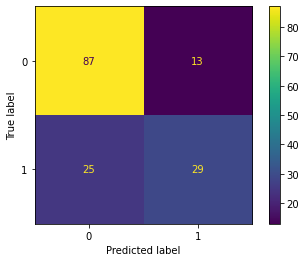

In [58]:
plot_confusion_matrix(knn, X_test, y_test) 